# Data preprocessing

Import libraries

In [1]:
# %pip install pandas numpy matplotlib seaborn statsmodels
# %pip install openpyxl
# %pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

## Loading the data

Currently, just work with one country. Later we can input different countries.

In [3]:
aquastat = pd.read_excel('data/aquastat.xlsx' , sheet_name='CAF') 
aquastat = aquastat[['Area','Variable Name','Year','Value']] # select useful columns

In [4]:
# selecting the country
countries = aquastat['Area'].unique()
countries.sort(0)
country = countries[12] # Belgium
data=aquastat.loc[aquastat['Area'] == country]  

# pivot the data
table=pd.pivot_table(data=data,values='Value',index=['Year'],columns='Variable Name')

## Cleaning the data

Create a pivot table. Country selection can be done here as well. Just use `index=['Area','Year']`

We have two options:

1. keep old data -> less variables, more data points per variable
   - remove columns with more than 20% missing.
   - impute the missing values with mean
2. only use recent data -> more variables, less data points per variable
   - only use data from 1997.
   - remove columns with more than 50% missing.
   - impute the missing values with mean

In [123]:
table1 = table.dropna(thresh=table.shape[0]*0.8, axis=1)
print(table.shape,table1.shape) # 46 out of 112
# table1.fillna(method='bfill', inplace=True)
table1


table_purged = table.dropna(thresh=table.shape[0], axis=1) # only 39 variables
# table1.to_csv('data/table1.csv')

# table2=pd.pivot_table(data=data[data['Year']>1987],values='Value',index=['Year'],columns='Variable Name')
# table2 = table2.dropna(thresh=table2.shape[0]*0.5, axis=1)
# print(table.shape,table2.shape) # 107 out of 112
# ## THIS IS A TEMPORARY PART
# # US['price'].fillna(df_US['price'].mean(), inplace = True)
# US2 = US.dropna(thresh=US.shape[0]*1, axis=1)
# # print(US.shape,US2.shape) # 3 variables got dropped
# US2.isnull().any().any()

(13, 112) (13, 46)


Variable Name,Dam capacity per capita,Dependency ratio,Environmental Flow Requirements,Exploitable: regular renewable groundwater,Gross Domestic Product (GDP),Groundwater produced internally,Groundwater: accounted inflow,Groundwater: accounted outflow to other countries,Groundwater: entering the country (total),Groundwater: leaving the country to other countries (total),...,Total exploitable water resources,Total internal renewable water resources (IRWR),Total internal renewable water resources per capita,Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
Year,,,,,,,,,,,,,,,,,,,,,
1962,3.916023,34.42623,10.16,1.0,1.326402e+10,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1305.341020,9193.000,0.9,18.3,18.3,1990.645056,8601.000,6.3
1967,3.799071,34.42623,10.16,1.0,1.999204e+10,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1266.357113,9476.000,0.9,18.3,18.3,1931.194597,8908.000,6.3
1972,6.527821,34.42623,10.16,1.0,3.720966e+10,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1243.394467,9651.000,0.9,18.3,18.3,1896.176562,9126.000,6.3
1977,6.460213,34.42623,10.16,1.0,8.283817e+10,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1230.516817,9752.000,0.9,18.3,18.3,1876.538146,9301.000,6.3
1982,14.693005,34.42623,10.16,1.0,9.209268e+10,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1221.871500,9821.000,0.9,18.3,18.3,1863.354037,9391.000,6.3
1987,14.623024,34.42623,10.16,1.0,1.493964e+11,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1216.051885,9868.000,0.9,18.3,18.3,1854.479124,9466.000,6.3
1992,14.406949,34.42623,10.16,1.0,2.347919e+11,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1198.083067,10016.000,0.9,18.3,18.3,1827.076677,9650.000,6.3
1997,14.156774,34.42623,10.16,1.0,2.527047e+11,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1177.278524,10193.000,0.9,18.3,18.3,1795.349750,9814.000,6.3
2002,13.922007,34.42623,10.16,1.0,2.571695e+11,0.9,0.0,0.0,0.0,0.0,...,1.0,12.0,1157.755248,10364.885,0.9,18.3,18.3,1765.576753,10078.969,6.3


## Let's assume we have the data clean... 

We select some variables here to do analysis. Ideally, we should have a logical process for variable selection.

### Loading multi-variate time-series analysis libraries (vector auto regression)

In [102]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.base.datetools import dates_from_str



Y=table['SDG 6.4.2. Water Stress']
# X=table.drop(columns='SDG 6.4.2. Water Stress')
X=pd.read_csv('data/test.csv') # GDP, population, precipitation
idx=dates_from_str(X['Year'].astype(str))

X.index=pd.Index(idx)
X=X.drop(columns=['Year'])

Xdiff=X.diff().dropna()

In [103]:
model = VAR(Xdiff)
fit = model.fit()
fit.summary()

c:\Users\Nyx\mda_test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, May, 2022
Time:                     21:28:24
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.1987
Nobs:                     11.0000    HQIC:                   9.49104
Log likelihood:          -88.5306    FPE:                    19327.0
AIC:                      9.76465    Det(Omega_mle):         7621.98
--------------------------------------------------------------------
Results for equation Population density
                                                         coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------------------
const                                                      12.308397         3.511842            3.505           0.000
L1.Population 

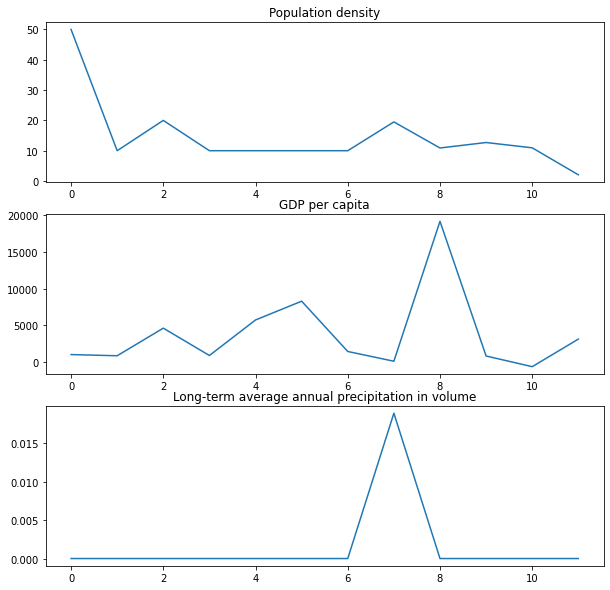

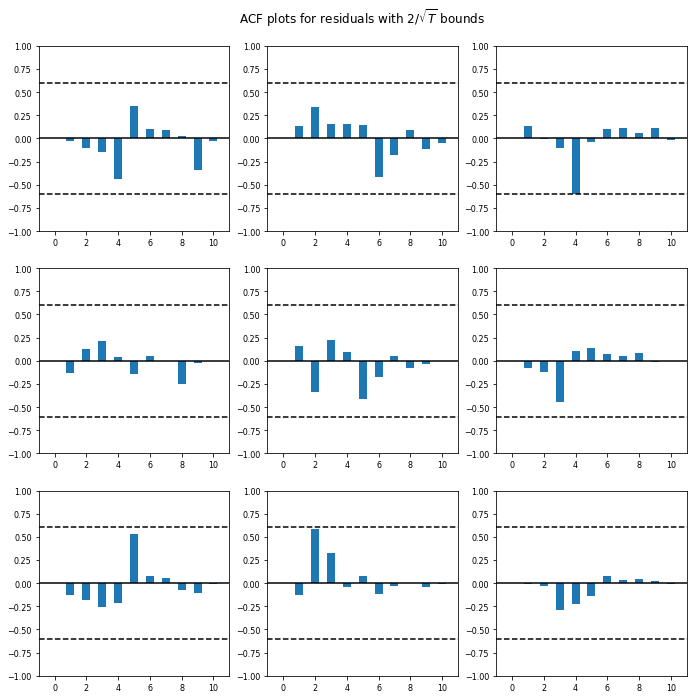

In [104]:
fit.plot();
fit.plot_acorr();

Predictions are made below. These are *diff* plots. Real values should be obtained by calculating the `cumsum` and adding them to the inital value.

[[1.22716524e+01 3.59354294e+03 3.32932188e-03]
 [1.16400107e+01 5.71397774e+03 1.88887426e-03]
 [1.17541924e+01 4.30623593e+03 1.69886811e-03]
 [1.17130360e+01 4.25892435e+03 1.99517363e-03]
 [1.17098161e+01 4.52585233e+03 1.97160493e-03]]


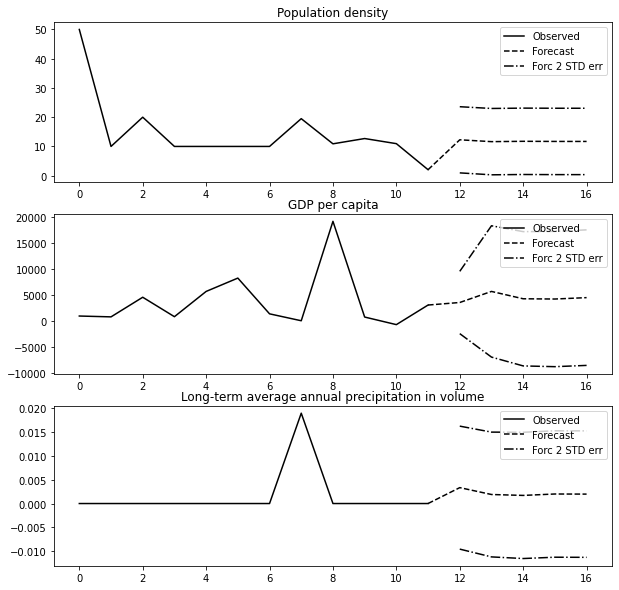

In [118]:
lag_order = fit.k_ar
pred=fit.forecast(Xdiff.values[-lag_order:], 5)
print(pred)
fit.plot_forecast(5);
# pd.DataFrame(pred,columns=['Population density','GDP per capita','Long-term average annual precipitation in volume'],index=X.index[-1]+range(1,31,5))

# X.index[-1]+range(1,31,5)

dataset of country location（latitude and longitude)

In [128]:
# location=pd.read_csv('../data/location.csv')
# location.head()

combine two datasets

In [129]:
# loc1 = location.loc[:, [ "Area","Latitude","Longitude"]]
# loc1.drop_duplicates(inplace=True)
# data =loc1.merge(data, on="Area", how="left")
# data

Calculate the new variables

In [130]:
# data['% of total country area irrigated (%)']=data['% of total country area cultivated']*data['% of cultivated land irrigated [harvested crop]']/100
# data['Industry, value added (% GDP)']=data['Industry, value added to GDP']/data['Gross Domestic Product (GDP)']*100
# data['Services, value added (% GDP)']=data['Services, value added to GDP']/data['Gross Domestic Product (GDP)']*100
# data['water resource per capita']=((data['Total renewable water resources']*1000000)-(data['Environmental Flow Requirements']*1000000))/data['Total population']

In [131]:
# print(data['water resource per capita'].describe())

In [132]:
data.isnull().sum()

realgdp     0
realcons    0
realinv     0
dtype: int64

## Data Preprocessing and exploration


In [133]:
df = data.copy()
#Data types
datadict = pd.DataFrame(df.dtypes)
#Missing values
datadict['MissingVal'] = df.isnull().sum()
#Unique values
datadict['NUnique']=df.nunique()
#Count of variable
datadict['Count']=df.count()
#Rename 0 to datatype
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
realgdp,float64,0,202,202
realcons,float64,0,202,202
realinv,float64,0,202,202


the distribution of water shortage index

In [134]:
df['water resource per capita'].hist(grid=False, bins=20)

KeyError: 'water resource per capita'

right skewed

dichotomization:

water shortage: water resource per capita<1700 m^3 per person per year

In [ ]:
df['c']=0
df['c'][df['water resource per capita']< 1700]=1

Delete rows with missing values of water shortage index

replace NaN in the predictors with mean

In [ ]:
df = df.dropna(axis=0,subset=['water resource per capita'])
df = df.fillna(df.mean())
df.shape

(153, 22)

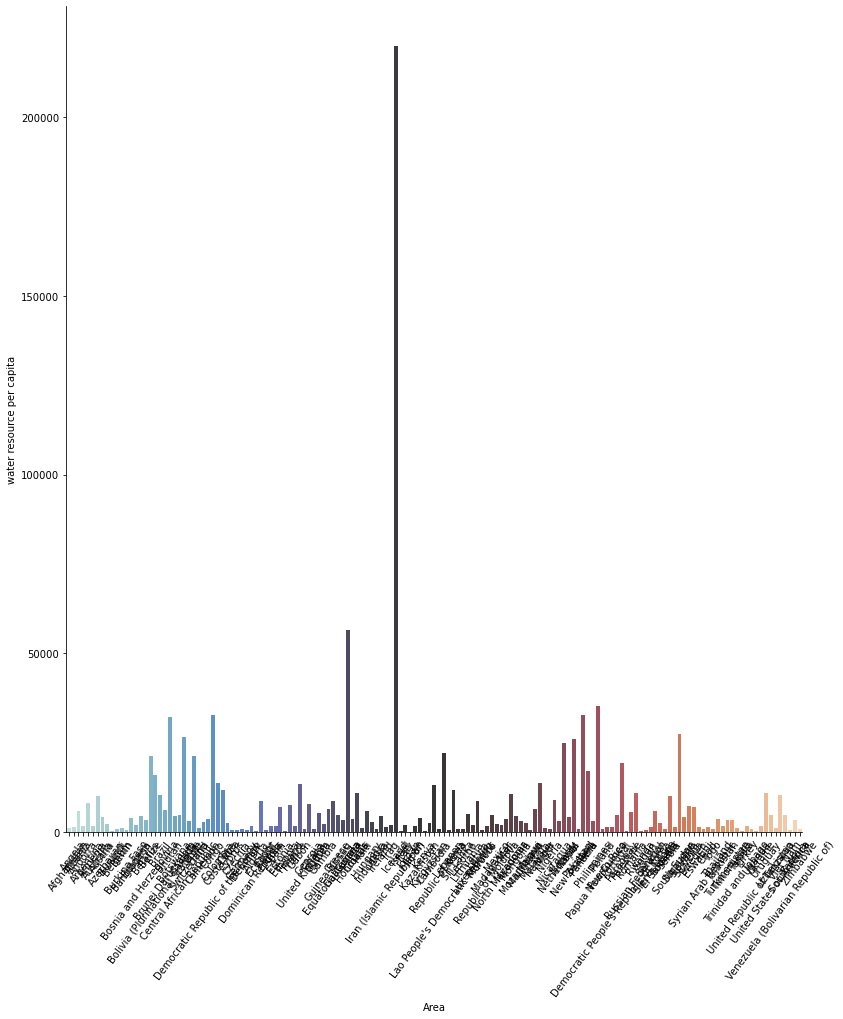

In [ ]:
g = sns.catplot(
    data=df, kind="bar", x = "Area", y='water resource per capita', 
    ci="sd", palette="icefire", alpha=.9, height=12)
g.set_xticklabels(rotation=53)
g.set_axis_labels( "Area", 'water resource per capita')

In [ ]:
data['water resource per capita'].describe()

count       153.000000
mean       7331.632203
std       19238.740866
min          92.265940
25%        1020.494949
50%        2935.528192
75%        7003.236344
max      220070.396210
Name: water resource per capita, dtype: float64

## Fit a logistic regression model

Variable selection procedure: backward elimination based on p-value 

In [ ]:
x_columns=['Latitude',
    'Longitude',
    '% of total country area cultivated',
    '% of total country area irrigated (%)',
    'Long-term average annual precipitation in depth',
    'Population density',
    'GDP per capita',
    'Agriculture, value added (% GDP)',
    'Industry, value added (% GDP)',
    'Services, value added (% GDP)',]
x = df[x_columns]
y = df['c']
x = sm.add_constant(x)

In [ ]:
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.391070
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                           10
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4077
Time:                        10:29:27   Log-Likelihood:                -59.834
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 1.709e-13
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -11.1856      6.055     -1.847      0.065     -23.053       0.681
Latitude                                           -0.0249      0.011     -2.268      0.023      -0.046      -0.003
Longitude                                           0.0032      0.005      0.629      0.529      -0.007       0.013
% of total country area cultivated                  0.0391      0.022      1.785      0.074      -0.004       0.082
% of total country area irrigated (%)              -0.1746      0.065     -2.707      0.007      -0.301      -0.048
Long-term average annual precipitation in depth    -0.0033      0.001     -5.295      0.000      -0.004      -0.002
Population density                                  0.0134      0.003      3.926      0.000       0.007       0.020
GDP per capita                                  -1.637e-05    1.8e-05     -0.909      0.363   -5.17e-05    1.89e-05
Agriculture, value added (% GDP)                    0.1606      0.064      2.521      0.012       0.036       0.286
Industry, value added (% GDP)                       0.1279      0.060      2.118      0.034       0.010       0.246
Services, value added (% GDP)                       0.1362      0.073      1.868      0.062      -0.007       0.279
===================================================================================================================
"""

remove longitude

In [ ]:
x_columns.remove('Longitude')
x = df[x_columns]
y = df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.392371
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      143
Method:                           MLE   Df Model:                            9
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4058
Time:                        10:29:28   Log-Likelihood:                -60.033
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 6.510e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             -10.8273      5.971     -1.813      0.070     -22.530       0.875
Latitude                                           -0.0244      0.011     -2.229      0.026      -0.046      -0.003
% of total country area cultivated                  0.0372      0.022      1.719      0.086      -0.005       0.080
% of total country area irrigated (%)              -0.1626      0.061     -2.655      0.008      -0.283      -0.043
Long-term average annual precipitation in depth    -0.0033      0.001     -5.366      0.000      -0.005      -0.002
Population density                                  0.0135      0.003      3.940      0.000       0.007       0.020
GDP per capita                                  -1.547e-05   1.79e-05     -0.864      0.388   -5.06e-05    1.96e-05
Agriculture, value added (% GDP)                    0.1594      0.063      2.530      0.011       0.036       0.283
Industry, value added (% GDP)                       0.1284      0.060      2.136      0.033       0.011       0.246
Services, value added (% GDP)                       0.1314      0.072      1.833      0.067      -0.009       0.272
===================================================================================================================
"""

remove GDP per captia

In [ ]:
x_columns.remove('GDP per capita')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.394936
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.4019
Time:                        10:29:28   Log-Likelihood:                -60.425
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.801e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -9.9414      5.833     -1.704      0.088     -21.374       1.491
Latitude                                           -0.0276      0.010     -2.683      0.007      -0.048      -0.007
% of total country area cultivated                  0.0412      0.021      1.962      0.050    3.98e-05       0.082
% of total country area irrigated (%)              -0.1530      0.060     -2.559      0.010      -0.270      -0.036
Long-term average annual precipitation in depth    -0.0034      0.001     -5.462      0.000      -0.005      -0.002
Population density                                  0.0129      0.003      3.904      0.000       0.006       0.019
Agriculture, value added (% GDP)                    0.1564      0.062      2.526      0.012       0.035       0.278
Industry, value added (% GDP)                       0.1277      0.060      2.129      0.033       0.010       0.245
Services, value added (% GDP)                       0.1138      0.068      1.676      0.094      -0.019       0.247
===================================================================================================================
"""

remove Services, value added (% GDP)

In [ ]:
x_columns.remove('Services, value added (% GDP)')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.404214
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            7
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3878
Time:                        10:29:28   Log-Likelihood:                -61.845
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.971e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.3262      1.020     -0.320      0.749      -2.325       1.673
Latitude                                           -0.0267      0.010     -2.640      0.008      -0.047      -0.007
% of total country area cultivated                  0.0291      0.020      1.490      0.136      -0.009       0.067
% of total country area irrigated (%)              -0.1496      0.059     -2.549      0.011      -0.265      -0.035
Long-term average annual precipitation in depth    -0.0032      0.001     -5.424      0.000      -0.004      -0.002
Population density                                  0.0136      0.003      3.999      0.000       0.007       0.020
Agriculture, value added (% GDP)                    0.0604      0.021      2.814      0.005       0.018       0.102
Industry, value added (% GDP)                       0.0407      0.028      1.478      0.139      -0.013       0.095
===================================================================================================================
"""

remove Industry, value added (% GDP)

In [ ]:
x_columns.remove('Industry, value added (% GDP)')
x=df[x_columns]
y=df['c']
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.411525
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            6
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3768
Time:                        10:29:28   Log-Likelihood:                -62.963
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 2.252e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.9030      0.593      1.522      0.128      -0.260       2.066
Latitude                                           -0.0266      0.010     -2.675      0.007      -0.046      -0.007
% of total country area cultivated                  0.0204      0.018      1.119      0.263      -0.015       0.056
% of total country area irrigated (%)              -0.1273      0.057     -2.233      0.026      -0.239      -0.016
Long-term average annual precipitation in depth    -0.0031      0.001     -5.369      0.000      -0.004      -0.002
Population density                                  0.0131      0.003      3.857      0.000       0.006       0.020
Agriculture, value added (% GDP)                    0.0503      0.020      2.537      0.011       0.011       0.089
===================================================================================================================
"""

remove % of total country area cultivated

In [ ]:
x_columns.remove('% of total country area cultivated')
x=df[x_columns]
x = sm.add_constant(x)
model = sm.Logit(y,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.415693
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      c   No. Observations:                  153
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            5
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3704
Time:                        10:29:28   Log-Likelihood:                -63.601
converged:                       True   LL-Null:                       -101.03
Covariance Type:            nonrobust   LLR p-value:                 1.000e-14
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               1.1068      0.568      1.950      0.051      -0.006       2.219
Latitude                                           -0.0238      0.009     -2.515      0.012      -0.042      -0.005
% of total country area irrigated (%)              -0.1296      0.057     -2.287      0.022      -0.241      -0.019
Long-term average annual precipitation in depth    -0.0031      0.001     -5.382      0.000      -0.004      -0.002
Population density                                  0.0145      0.003      4.389      0.000       0.008       0.021
Agriculture, value added (% GDP)                    0.0515      0.020      2.624      0.009       0.013       0.090
===================================================================================================================
"""

predicted accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y,round(result.predict(x)))

0.8235294117647058

the likelihood of a water shortage 

In [ ]:
df['likelihood'] = result.predict(x)

## Divide the water shortage indicator into 4 risk levels

In [ ]:
category = pd.cut(aquastat['water resource per capita'],bins=[0,500,1000,1700,220071],labels=['3','2','1','0'])
aquastat.insert(21,'c of shortage',category)

In [ ]:
data = data.dropna(axis=0,subset=['water resource per capita'])
data = data.fillna(df.mean())

In [ ]:
data['c of shortage'].unique()

array([1, 0, 3, 2], dtype=int64)

In [ ]:
x_columns=['Latitude',
    'Longitude',
    '% of total country area cultivated',
    '% of total country area irrigated (%)',
    'Long-term average annual precipitation in depth',
    'Population density',
    'GDP per capita',
    'Agriculture, value added (% GDP)',
    'Industry, value added (% GDP)',
    'Services, value added (% GDP)']
x=data[x_columns]
y=data['c of shortage']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('classifier', RandomForestClassifier())])
param_grid = [
    {'classifier': [RandomForestClassifier()],
    'classifier__n_estimators':[50,100],'classifier__max_features': [1, 2, 3, 4],
    'classifier__min_samples_leaf':[1,2,3]},
    {'classifier': [LogisticRegression(max_iter=1000)]},
    {'classifier': [naive_bayes.GaussianNB()]},
    {'classifier': [KNeighborsClassifier()],
     'classifier__leaf_size': [10,20,30],
     'classifier__n_neighbors': [3,5,7,10]}
    ]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best params:
{'classifier': KNeighborsClassifier(leaf_size=10, n_neighbors=10), 'classifier__leaf_size': 10, 'classifier__n_neighbors': 10}

Best cross-validation score: 0.65
